In [4]:
import cv2
import skimage
import matplotlib.pyplot as plt
import numpy as np
import imutils
# !pip install imutils

In [3]:
image = cv2.imread("/home/dramon/Downloads/DJI mini/Oaxaca Julio/DJI_0703.JPG", cv2.IMREAD_UNCHANGED)

In [32]:
def grafica(image):
    plt.figure(figsize=(10,10))
    # plt.imshow(imutils.opencv2matplotlib(image))
    plt.imshow(image)
    plt.colorbar()
    plt.axis("off")
    plt.show()

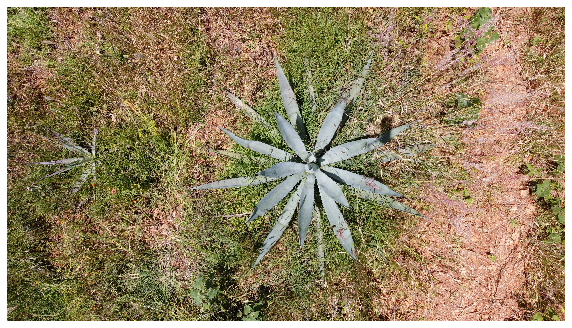

In [7]:
grafica(image)

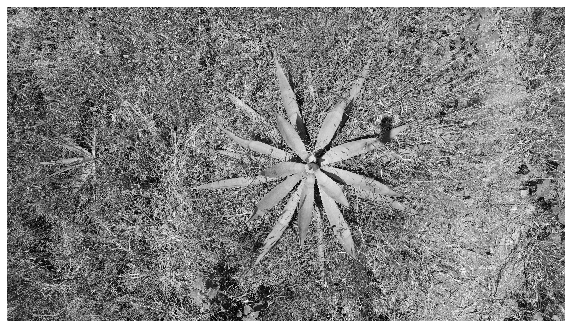

In [11]:
grafica(image[:,:,1])

In [24]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
h, l, s = cv2.split(hsv)

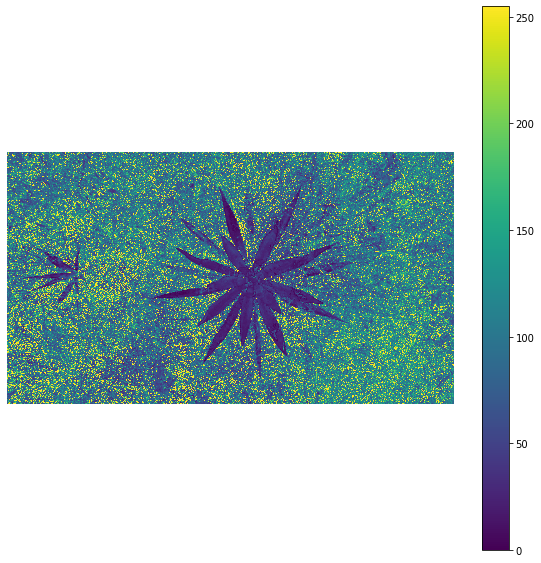

In [33]:
grafica(hsv[:,:,2])


In [25]:
frecc, rango = np.histogram(s.flatten(), bins=40)

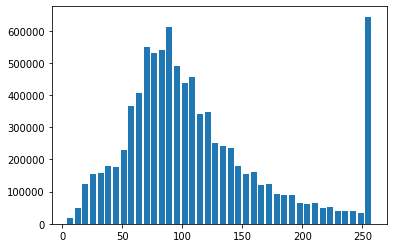

In [29]:
plt.bar(rango[1:], frecc, 5)
plt.show()

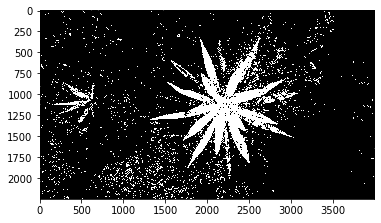

In [39]:
plt.imshow(s < 50, cmap=plt.cm.gray)
plt.show()

In [40]:
mask = s < 50

In [44]:
mask = mask.astype(np.uint8) * 255

In [49]:
# ejemplo graficar con opencv
cv2.imshow("Venana", cv2.resize(mask, None, fx=0.3, fy= 0.3)); cv2.waitKey(); cv2.destroyAllWindows()

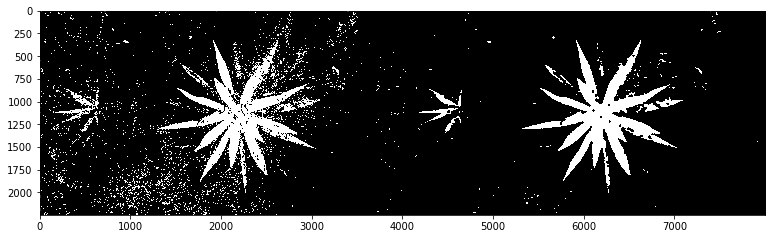

In [57]:
kerneldilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
closed = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kerneldilate)
kerneldilate2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
closed = cv2.morphologyEx(closed, cv2.MORPH_CLOSE, kerneldilate2)
plt.figure(figsize=(13,6))
plt.imshow(np.hstack((mask, closed)), cmap=plt.cm.gray)
plt.show()